In [2]:
# !pip install transformers sklearn matplotlib

In [51]:
import pandas as pd
df = pd.read_csv('TweetsCOV19_preprocessed.csv', encoding='utf-8')
sentences = list(df['TweetText'][:100].to_numpy())
# sentences

In [69]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch import nn

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.classifier1 = nn.Sequential(
    nn.Linear(model.config.hidden_size, 16),
    nn.ReLU(),
    nn.Linear(16, 5),
    nn.Softmax(dim=1)
)
state_dict = torch.load("model_saved.pt")
model.load_state_dict(state_dict)

model_base = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predic

In [70]:
model, model_base

def get_last_layer_embeddings(model, sentences):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    cls_embeddings = last_hidden_state[:, 0, :].detach().numpy()
    return cls_embeddings

def tsne_reduction(embeddings, n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state)
    reduced_embeddings = tsne.fit_transform(embeddings)
    return reduced_embeddings


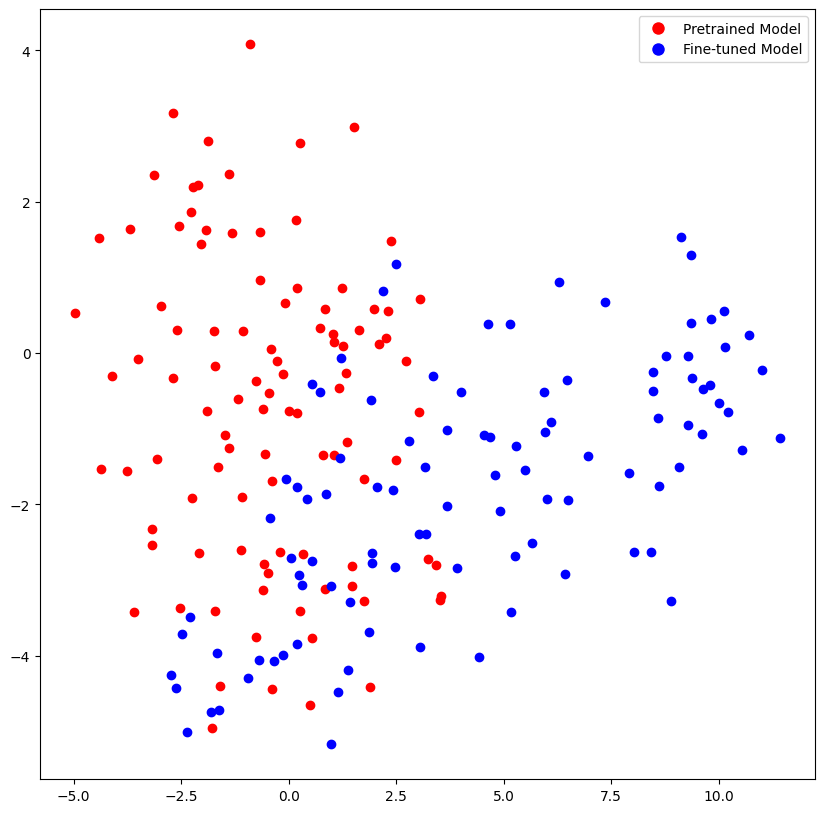

In [71]:
def get_last_layer_embeddings(model, sentences):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    cls_embeddings = last_hidden_state[:, 0, :].detach().numpy()
    return cls_embeddings

def tsne_reduction(embeddings, n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state)
    reduced_embeddings = tsne.fit_transform(embeddings)
    return reduced_embeddings

def plot_embeddings(embeddings, labels, color):
    for i, label in enumerate(labels):
        x, y = embeddings[i, :]
        plt.scatter(x, y, c=color)
        # plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

# Get embeddings from the pretrained model (model_base)
embeddings_base = get_last_layer_embeddings(model_base, sentences)
reduced_embeddings_base = tsne_reduction(embeddings_base)

# Get embeddings from the fine-tuned model (model)
embeddings_finetuned = get_last_layer_embeddings(model, sentences)
reduced_embeddings_finetuned = tsne_reduction(embeddings_finetuned)

from matplotlib.lines import Line2D

# Plot embeddings
plt.figure(figsize=(10, 10))
plot_embeddings(reduced_embeddings_base, sentences, color='red')
plot_embeddings(reduced_embeddings_finetuned, sentences, color='blue')

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Pretrained Model', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Fine-tuned Model', markerfacecolor='blue', markersize=10)
]

# Add legend to the plot
plt.legend(handles=legend_elements)

plt.show()



In [72]:
# try umap

/usr/local/lib/python3.10/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

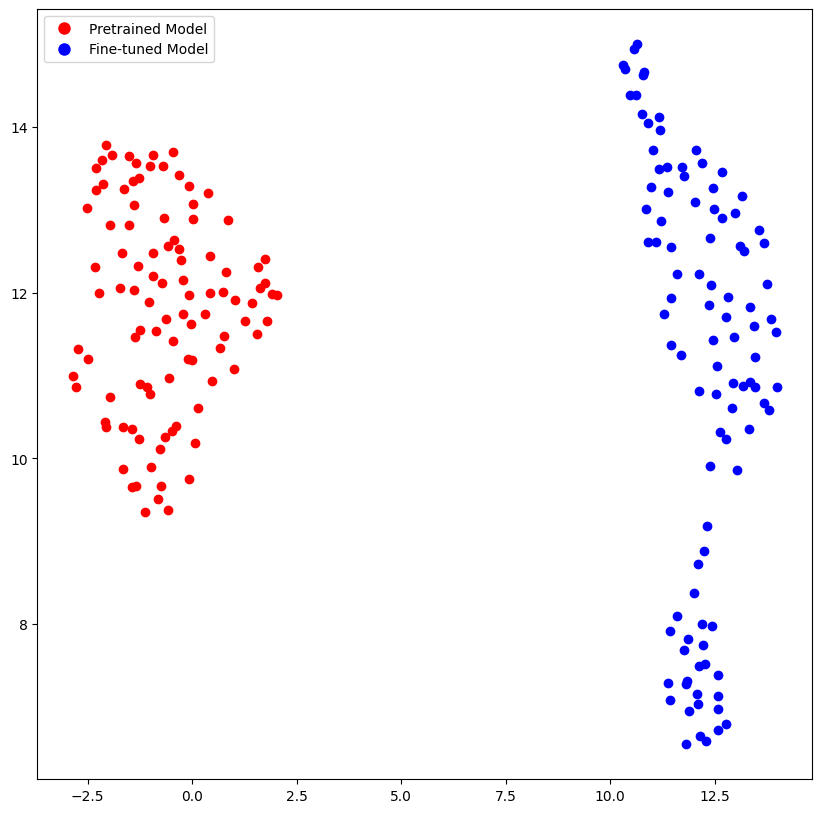

In [74]:
import umap

def umap_reduction(embeddings, n_components=2, n_neighbors=15, min_dist=0.1, random_state=42):
    reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
    reduced_embeddings = reducer.fit_transform(embeddings)
    return reduced_embeddings

# Get embeddings from the pretrained model (model_base)
embeddings_base = get_last_layer_embeddings(model_base, sentences)
reduced_embeddings_base = umap_reduction(embeddings_base)

# Get embeddings from the fine-tuned model (model)
embeddings_finetuned = get_last_layer_embeddings(model, sentences)
reduced_embeddings_finetuned = umap_reduction(embeddings_finetuned)

# Plot embeddings
plt.figure(figsize=(10, 10))
plot_embeddings(reduced_embeddings_base, sentences, color='red')
plot_embeddings(reduced_embeddings_finetuned, sentences, color='blue')

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Pretrained Model', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Fine-tuned Model', markerfacecolor='blue', markersize=10)
]

# Add legend to the plot
plt.legend(handles=legend_elements)

plt.show()
